### **pytorch**

In [2]:
!nvidia-smi

Tue Apr 22 14:11:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
print("GPU available:", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = torch.tensor([1.0, 2.0, 3.0]).to(device)

2.6.0+cu124
GPU available: True


### **creating tensors**

In [4]:
#scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [5]:
scalar.ndim

0

In [6]:
scalar.item()

7

In [7]:
#vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [8]:
vector.ndim

1

In [9]:
vector.shape #elements

torch.Size([2])

In [10]:
#matrix
matrix  = torch.tensor([[7, 8],
                        [9,10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [11]:
matrix.ndim

2

In [12]:
matrix[1]

tensor([ 9, 10])

In [13]:
matrix.shape

torch.Size([2, 2])

In [14]:
#tensor
tensor = torch.tensor([[[0,0,0],
                        [0,0,0],
                        [0,0,0]],

                        [[2,2,3],
                        [4,5,6],
                        [7,8,9]]])
tensor

tensor([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[2, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [15]:
tensor.ndim

3

In [16]:
tensor.shape

torch.Size([2, 3, 3])

In [17]:
tensor[1][2][1:]

tensor([8, 9])

### **Random tensors**

why random tensors? cuz the way many neural networks learn is by start with tensors full with random numbers and then adjuct those random numbers to better represent the data

start w/ random numbers -> look at data -> update random numbers -> look at data -> update random numbers

In [18]:
#random tensors of size/shape (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.0241, 0.8109, 0.2196, 0.2104],
        [0.6638, 0.0658, 0.1818, 0.7683],
        [0.3011, 0.5441, 0.2236, 0.5031]])

In [19]:
random_tensor.shape

torch.Size([3, 4])

In [20]:
random_tensor.ndim

2

In [21]:
#create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, weight, color
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### **Zeros and ones**

In [22]:
#create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [23]:
#create a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [24]:
ones.dtype

torch.float32

In [25]:
random_tensor.dtype

torch.float32

### **creating a range of tensors and tensors-like**



In [26]:
# use torch.range()
one_to_ten = torch.arange(start=0, end=11, step=1)
one_to_ten

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [27]:
#creating tensors_like
ten_zeros= torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
#creating tensors_like
ten_ones= torch.ones_like(input=one_to_ten)
ten_ones

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### **tensors datatype**

**note:** tensor datatype is one of the 3 big errors you run into in pytorch & deep learning
1. tensor not right datatype tensor.dtype
2. tensor not right shape  tensor.shape
3. tensor not right device tensor.shape

if you want to do operations b/w two tensors from diff device may not work

In [29]:
# float 32 tensor
float_32_tensor = torch.tensor([3.0, 6,0., 7.0],  dtype=None, #what data type the tensor
                                                  device=None, # what device your tensor on
                                                  requires_grad=False) # whether or not to track gradients with this tensor operations
float_32_tensor

tensor([3., 6., 0., 7.])

In [30]:
float_32_tensor.dtype

torch.float32

In [31]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 0., 7.], dtype=torch.float16)

In [32]:
float_16_tensor * float_32_tensor

tensor([ 9., 36.,  0., 49.])

In [33]:
int_32_tensor = torch.tensor([3,6,9], dtype = torch.long)
int_32_tensor

tensor([3, 6, 9])

### **getting info from tensors**

In [34]:
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.7957, 0.7138, 0.3736, 0.6080],
        [0.2807, 0.8916, 0.2959, 0.6666],
        [0.2775, 0.1831, 0.7668, 0.9216]])

In [35]:
#find details about tensor
print(some_tensor)
print(f"datatype of tensor: {some_tensor.dtype} ")
print(f"shape of tensor: {some_tensor.shape} ")
print(f"device of tensor: {some_tensor.device} ")

tensor([[0.7957, 0.7138, 0.3736, 0.6080],
        [0.2807, 0.8916, 0.2959, 0.6666],
        [0.2775, 0.1831, 0.7668, 0.9216]])
datatype of tensor: torch.float32 
shape of tensor: torch.Size([3, 4]) 
device of tensor: cpu 


### **manipulating tensors**

tensor operations include:
addition
subtraction
multiplication (element-wise)
division
matrix multiplication


In [36]:
#create a tensor
Tensor = torch.tensor([1, 2, 3])
Tensor + 100

tensor([101, 102, 103])

In [37]:
Tensor * 10

tensor([10, 20, 30])

In [38]:
Tensor

tensor([1, 2, 3])

In [39]:
Tensor - 10

tensor([-9, -8, -7])

In [40]:
torch.mul(Tensor, 10)

tensor([10, 20, 30])

In [41]:
torch.add(Tensor, 10)

tensor([11, 12, 13])

### **MATRIX manipluation**

two main ways of performing multiplication in neural networks and dl:

1. element-wise multiplication.
2. matrix multiplication (dot product).

two rules that performing matrix multiplication needs to satisfy:

1. the inner d match
2. the resulting matrix has shape of outer d.

In [42]:
#element wise multiplication
print(Tensor, "*", Tensor)
print(f"Equals: {Tensor * Tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [43]:
#matrix multiplication
torch.matmul(Tensor, Tensor)

tensor(14)

In [44]:
 #matrix multiplication by hand
 1*1+2*2+3*3 # same as matmul

14

In [45]:
%%time
value = 0
for i in range (len(Tensor)):
  value += Tensor[i] * Tensor[i]
value

CPU times: user 4 µs, sys: 992 µs, total: 996 µs
Wall time: 884 µs


tensor(14)

In [46]:
%%time
torch.matmul(Tensor, Tensor)

CPU times: user 182 µs, sys: 38 µs, total: 220 µs
Wall time: 188 µs


tensor(14)

### **one of the most common errors in deep learning: shape errors**

In [47]:
#dot multiplication
tensor_A = torch.tensor([[1,2],
                         [3, 4],
                         [5, 6]])
tensor_B = torch.tensor([[7,8], #([[7,8, 9],[10, 11, 12]]) this right
                         [9, 10],
                         [11, 12]])

#torch.mm(tensor_A, tensor_B)
# to fix shape get transpose

torch.matmul(tensor_A, tensor_B.T).shape #we had no error

torch.Size([3, 3])

In [48]:
tensor_B.shape, tensor_B.T.shape # WOAH MATCHING

(torch.Size([3, 2]), torch.Size([2, 3]))

###**tensor aggregation**
min,max,mean,sum

In [49]:
#create a tensor
x = torch.arange(1,100,10)
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [50]:
#find min
torch.min(x)
x.min()

tensor(1)

In [51]:
#find max
torch.max(x)
x.max()

tensor(91)

In [52]:
#find mean requires tensor float type
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [53]:
#find sum
torch.sum(x), x.sum()

(tensor(460), tensor(460))

###**finding positional min and max**

In [54]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [55]:
#find position of min using argmin() -> return index
x.argmin()

tensor(0)

In [56]:
x[0]

tensor(1)

In [57]:
x.argmax()

tensor(9)

In [58]:
x[9]

tensor(91)

In [59]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

###**reshaping, staching,squeezing, and unsqueezing tensors**
**reshaping** - reshape input tensor to defined shape

**view** - return view of tensor but keep same memory at original

**stacking** - combine multi tensors on top of each other (vstach) or side by side

**squeeze** - remove '1' dimensions from a tensor

**unsqueeze** - add 1 d to target tensor

**permute** - return a view of the
tensor with d permuted


In [60]:
import torch
x = torch.arange(1, 11, 1)
x, x.shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]))

In [61]:
# add extra D
x_reshaped = x.reshape(2,5)
x_reshaped, x_reshaped.shape

(tensor([[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]]),
 torch.Size([2, 5]))

In [62]:
#change view
z = x.view(2, 5)  # return view but memory stay at x so changing z means changing x
z, z.shape, x, x.shape

(tensor([[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]]),
 torch.Size([2, 5]),
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 torch.Size([10]))

In [63]:
z[: , 0] = 5
x, z #both changed even if z have diff view

(tensor([ 5,  2,  3,  4,  5,  5,  7,  8,  9, 10]),
 tensor([[ 5,  2,  3,  4,  5],
         [ 5,  7,  8,  9, 10]]))

In [64]:
#stack tensors on top of each other
x_stacked = torch.stack((x, x, x, x), dim= 1)
x_stacked, x_stacked.shape

(tensor([[ 5,  5,  5,  5],
         [ 2,  2,  2,  2],
         [ 3,  3,  3,  3],
         [ 4,  4,  4,  4],
         [ 5,  5,  5,  5],
         [ 5,  5,  5,  5],
         [ 7,  7,  7,  7],
         [ 8,  8,  8,  8],
         [ 9,  9,  9,  9],
         [10, 10, 10, 10]]),
 torch.Size([10, 4]))

In [65]:
x = torch.zeros(2, 1, 2, 1, 1, 2)
x.shape

torch.Size([2, 1, 2, 1, 1, 2])

In [66]:
y = torch.squeeze(x)
y, y.shape

(tensor([[[0., 0.],
          [0., 0.]],
 
         [[0., 0.],
          [0., 0.]]]),
 torch.Size([2, 2, 2]))

In [67]:
y = torch.squeeze(x,[3,4]) #if we wnt to indicate to which single D to remove
y.shape

torch.Size([2, 1, 2, 2])

In [68]:
x_reshaped, x_reshaped.shape

(tensor([[ 5,  2,  3,  4,  5],
         [ 5,  7,  8,  9, 10]]),
 torch.Size([2, 5]))

In [69]:
x_reshaped.squeeze(), x_reshaped.squeeze().shape # same cuz no single D to remove

(tensor([[ 5,  2,  3,  4,  5],
         [ 5,  7,  8,  9, 10]]),
 torch.Size([2, 5]))

In [70]:
#torch unsqueeze - add single D to a target tensor
x = torch.arange(1,11,1)
x_squeezed = x.unsqueeze(dim=0)
x, x.shape, x_squeezed, x_squeezed.shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 torch.Size([10]),
 tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 torch.Size([1, 10]))

In [71]:
import torch
#permute - rearange the D in some order
x = torch.rand(2,3,5)
x, x.shape

(tensor([[[0.8353, 0.4732, 0.1634, 0.1301, 0.6202],
          [0.1104, 0.3944, 0.5417, 0.7945, 0.3558],
          [0.8838, 0.8680, 0.9046, 0.5655, 0.9786]],
 
         [[0.5888, 0.1576, 0.5736, 0.9021, 0.4624],
          [0.5991, 0.3960, 0.7068, 0.1100, 0.7731],
          [0.9740, 0.8387, 0.0054, 0.6457, 0.9002]]]),
 torch.Size([2, 3, 5]))

In [72]:
x_permuted = torch.permute(x, (2,1,0))
x_permuted, x_permuted.shape

(tensor([[[0.8353, 0.5888],
          [0.1104, 0.5991],
          [0.8838, 0.9740]],
 
         [[0.4732, 0.1576],
          [0.3944, 0.3960],
          [0.8680, 0.8387]],
 
         [[0.1634, 0.5736],
          [0.5417, 0.7068],
          [0.9046, 0.0054]],
 
         [[0.1301, 0.9021],
          [0.7945, 0.1100],
          [0.5655, 0.6457]],
 
         [[0.6202, 0.4624],
          [0.3558, 0.7731],
          [0.9786, 0.9002]]]),
 torch.Size([5, 3, 2]))

In [73]:
x_original = torch.rand(size= (224,224,3))
x_permuted = x_original.permute(2,0,1)
x_permuted, x_permuted.shape #share same memory

(tensor([[[0.4804, 0.0530, 0.0201,  ..., 0.6096, 0.3105, 0.6490],
          [0.3964, 0.6528, 0.7856,  ..., 0.3670, 0.8766, 0.7172],
          [0.2899, 0.7480, 0.4815,  ..., 0.6082, 0.1802, 0.4773],
          ...,
          [0.0264, 0.9620, 0.7252,  ..., 0.4033, 0.8217, 0.0906],
          [0.1008, 0.5752, 0.3505,  ..., 0.3230, 0.4523, 0.8188],
          [0.9139, 0.9898, 0.0238,  ..., 0.5162, 0.2019, 0.3362]],
 
         [[0.0155, 0.4774, 0.9545,  ..., 0.6667, 0.9565, 0.1733],
          [0.8510, 0.3892, 0.4424,  ..., 0.9957, 0.3308, 0.6128],
          [0.3866, 0.0496, 0.5544,  ..., 0.5971, 0.2659, 0.5876],
          ...,
          [0.9577, 0.3104, 0.0636,  ..., 0.2206, 0.6220, 0.5291],
          [0.8371, 0.8484, 0.6603,  ..., 0.6228, 0.3875, 0.3967],
          [0.6531, 0.4655, 0.7768,  ..., 0.4366, 0.1016, 0.1087]],
 
         [[0.1510, 0.0611, 0.9083,  ..., 0.2043, 0.9997, 0.1757],
          [0.3061, 0.0488, 0.7665,  ..., 0.5443, 0.4198, 0.5638],
          [0.4350, 0.4434, 0.2273,  ...,

In [74]:
x_original [0,0,0] = 5
x_original [0,0,0], x_permuted [0,0,0]

(tensor(5.), tensor(5.))

###**selecting data in tensors**
indexing - similar to numpy

In [75]:
#create tensor
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [76]:
#index
x[0][0][2]

tensor(3)

### **numpy a popular scientific python numerical computing library,**

 pytorch interact w/ numpy
 data in numpy, want in pytorch ttensor -> torch.from_numpy(ndarray)
 pytorch tensor -> numpy -> torch.Tensor.numpy()

In [77]:
#numpy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 10.0 )
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64))

In [78]:
array = np.arange(1.0, 10.0 )
tensor = torch.from_numpy(array).type(torch.float32) #changing value of tensor does not change value of orignal array
array, tensor # warning when convert numpy to tensor it gets defualt numpy datatype

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [79]:
array.dtype

dtype('float64')

In [80]:
torch.arange(1.0, 8.0).dtype

torch.float32

In [81]:
tensor = torch.arange(1, 8)
numpy_tensor = tensor.numpy() #does not share memory
numpy_tensor, tensor

(array([1, 2, 3, 4, 5, 6, 7]), tensor([1, 2, 3, 4, 5, 6, 7]))

###** reproducability trying to take random of random**
in short how a neural network learn:
start w/ rand nos. -> tensor operations -> update random numbers to tryand make them better representations of the data -> again -> again -> until convergence.

to reduce randomness in nn & pytorch come the concept of **random seed**.

essentally what the random seed do : flavour randomness.


In [82]:
random_A = torch.rand(3, 4) # every time we run we have diff nos.
random_B = torch.rand(3, 4)

print(random_A)
print(random_B)
print(random_A == random_B)

tensor([[0.8573, 0.1088, 0.5710, 0.0504],
        [0.3922, 0.2269, 0.9369, 0.0331],
        [0.1141, 0.5196, 0.0161, 0.9074]])
tensor([[0.1991, 0.6306, 0.5889, 0.3827],
        [0.9167, 0.6416, 0.1695, 0.9446],
        [0.9269, 0.7584, 0.5767, 0.7741]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [83]:
#lets make random bur reproducable tensors
import torch

#set the random seed
random_seed = 42
torch.manual_seed(random_seed)

rand_tensor_A = torch.rand(3, 4)

torch.manual_seed(random_seed)
rand_tensor_B = torch.rand(3, 4)

print(rand_tensor_A)
print(rand_tensor_B)
print(rand_tensor_A == rand_tensor_B)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## RUNNING tensors / pytorch obj. on GPUs making faster computation
GPUs = faster computations on numbers cuda + nvidia h/w

how? use free GPU in google colab or ur own GPU but need extra setup for DL
use cloud computing - AWS, GCP, AZURE - allow to rent computers on the cloud and use them

to set your GPU get cuda + pytorch local setup

In [84]:
!nvidia-smi

Tue Apr 22 14:11:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P0             26W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [85]:
#check GPU access w/ pytorch
import torch
torch.cuda.is_available()

True

In [86]:
#putting tensors and models on the GPU, as using GPU results faster computation
tensor = torch.tensor([1,2,3], device = "cpu") #tensor n default cpu, even w/o specification
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [87]:
# if cuda available use gpu else cpu
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [88]:
#CONvert tensor back to cpu cuz numpy do not work w/ gpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [89]:
#setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [90]:
# count no of devices
torch.cuda.device_count() # some times we want to run diff models in diff device each

1

## **NN**

FINALLY!!!!!!

###**pytorch workflow**

what we will do
1. data prepare and load
2. build model
3. fitting model to data training
4. make predictions ans evaluating the model
5. save and load model
6. putting it all together

In [91]:
import torch
from torch import nn #nn contains all of pytorch building block
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

##preparing and loading data

data can be almost anything in ml

excel spreadsheet
images of any kind
videos (youtube has a lot of data...)
audio like song or podcast
DNA
text

ml a game of 2 parts:
1. get data into numerical representation.
2. build a model that learns patterns in that numerical representation.

toshow this, will create someknown data using the linear regression formula

we will use a linear regression formula to make a straight line with known parameters
we will use linear regression


In [92]:
#create known parameters

weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[ :10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [93]:
len(X), len(y)

(50, 50)

### **splitting data into training and test sets (most important concept in machine learning in general)**



In [94]:
# create a train / test split
#very imp concept

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[: train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

how can we better visualize our data

In [95]:
import matplotlib.pyplot as plt

def plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):
  #plot traing data, test data, and compare predictions

  #plot training data in blue
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c="b", s=4, label = "Training data")

  #plot test data in green
  plt.scatter(test_data, test_label, c="g",s=4, label = "Test data")

  #are there predictions?
  if predictions is not None:
    #plot the predictions if they exist
    predictions = predictions.detach().cpu().numpy()
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions") #to see how our predictions are compared to y labels

  #show the legend
  plt.legend(prop={"size" : 14}) #prop from properities

#### creating our first model using linear regression


In [96]:
from torch import nn

class linearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [97]:
torch.manual_seed(42)

model_0 = linearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [98]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making predictions using 'torch.inference_mode()'
we want how the model now will predict y_test based on X_test

In [99]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [100]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [101]:
with torch.inference_mode(): #? makes the code runs faster
  y_preds = model_0(X_test)

#you can also do something similar with torch.no_grad(), however torch.inference_mode is preferable
#with torch.no_grad():
#  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [102]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

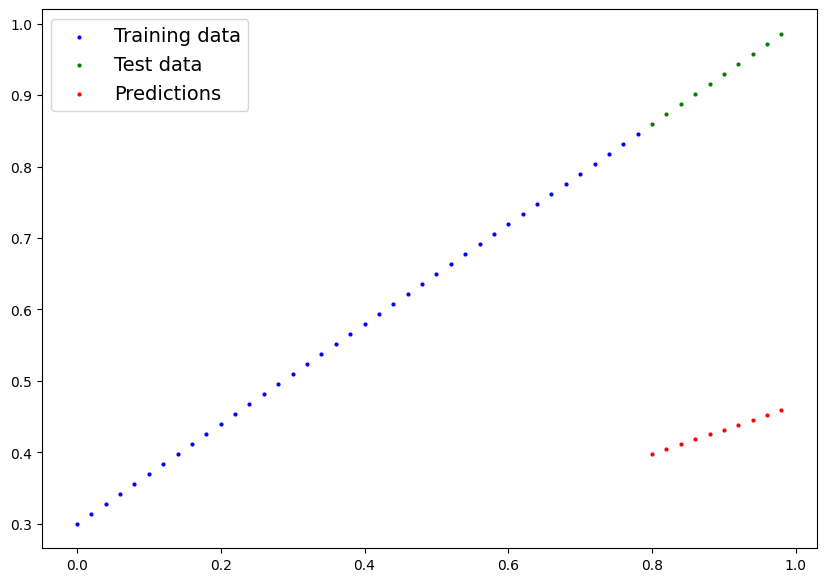

In [103]:
plot_predictions(predictions= y_preds)

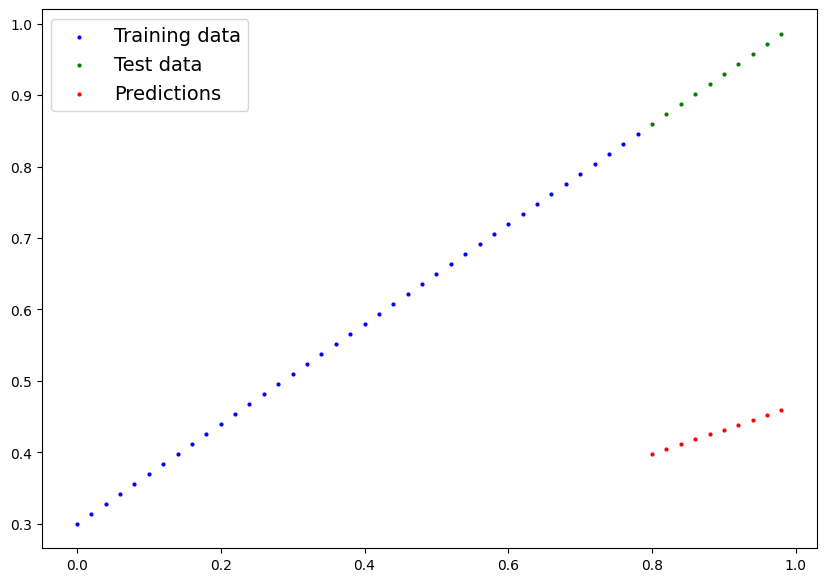

In [104]:
plot_predictions(predictions=y_preds) #poor performance

## 3. train model
the whole idea of training is to move from poor representation of data to a fairly good
representation of data_parallel
one way to measure how poor or how wrong your model predictions is to use a loss function

note: loss = coss = criterian

#### things we need to train:

* **loss function** - is a function to measure how wrong is our model predictions to the ideal outputs, lower is better.
* **Optimizer** - takes into account the loss of a model and adjuct the model's parameters (e.g. weight & bias)

for pytorch we need:
* a training loop
* a testing loop

In [105]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [106]:
#chech model parameters, a parameter is a value that function sets itself
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [107]:
#setup loss fn
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01 )

 choosing the loss function and opimizer is problem specific
 ex:

    linear regression nn.L1Loss()
    
    classification nn.BCELoss()

### building a training loop in pytorch

1. loop through the data
2. forward pass (this involves moving through forward() moving from input to output - also called forward propagation)
3. calculate the loss (compare forward pass predictions to ground truth labels)
4. loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation)
5. optimizer step - use the optimizer to adjuct our model parameters to try and improve the loss (gradient descent)

In [108]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [109]:
# an epoch is one loop through the data
torch.manual_seed(42)
epochs = 200

#tracking experiments, track different values so if we used different model, factor we can compare
epoch_count = []
train_loss_values = []
test_loss_values = []

#we can turn this to training fn and use it anytime
# 0. loop through the data
for epoch in range(epochs):#pass data through number of epochs e.g 100
  #set the model to training mode
  model_0.train()  # train mode  in pytorch sets all parameters that requires gradients to require gradients

  #1. forward pass
  y_pred = model_0(X_train) #pass data through the model,
     #this will perform the forward() method located within the model project

  #2.calculate the loss
  loss = loss_fn(y_pred, y_train)  # how wrong the model predictions are

  #3. optimizer zero grad
  optimizer.zero_grad()   #they zero the optimizer gradients to start fresh each forward pass

  #4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()# perform backpropagation on loss fn, compute gradients of every parameter with requires_grad = True

  #5. step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer change will acculumate through the loop so we have to zero them above in step



  ### testing
  model_0.eval() # turns off gradients tracking/ different settings not needed for evaluation/testing
  with torch.inference_mode(): #turns off gradient descent and couple of things behind the scences
  #with torch.no_grad():
    #do the forward pass
    test_pred = model_0(X_test)

    #calculate the loss
    test_loss = loss_fn(test_pred, y_test)


  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss}")
    #print the model state dict
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | test loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [110]:
#epoch_count, train_loss_values, test_loss_values

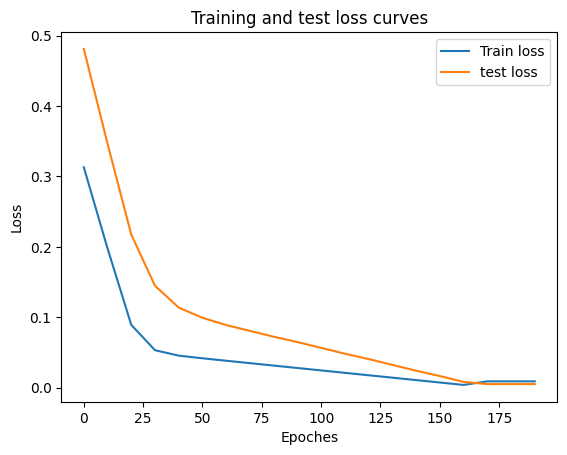

In [111]:
#plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label= "Train loss")
plt.plot(epoch_count, test_loss_values, label= "test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.legend();

In [112]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [113]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [114]:
weight, bias

(0.7, 0.3)

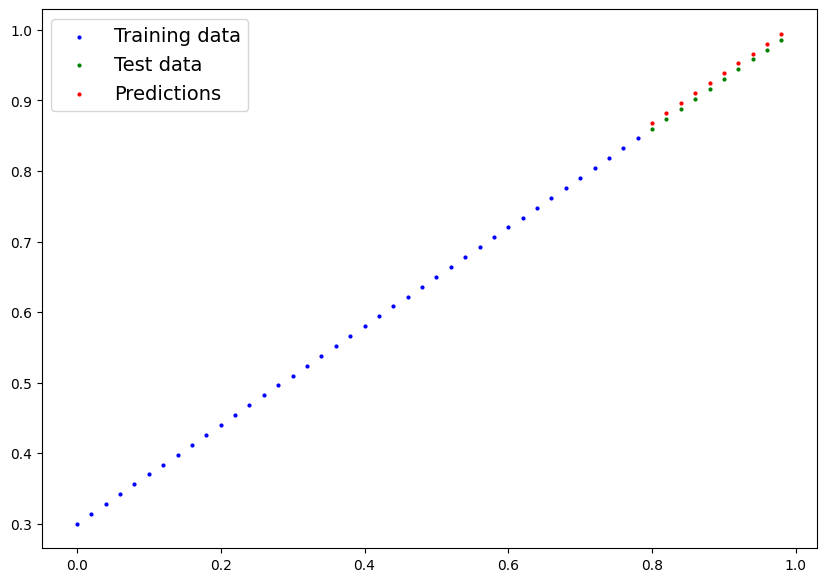

In [115]:
plot_predictions(predictions= y_preds_new);

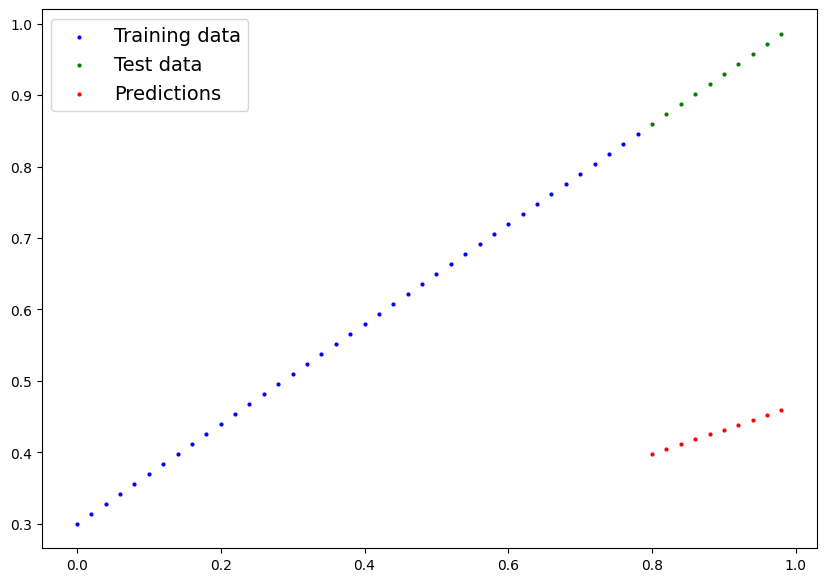

In [116]:
plot_predictions(predictions= y_preds);

## Saving a model in Pytorch
3 methods for saving/loading in pytorch
 1. torch.save() - allow to save pytorch obj in pickle format
 2. torch.load() - allow to load saved pytorch obj
 3. torch.nn.Module.load_state_dict() - allow to load model saved state dictionary

In [117]:
#sVING OUR PYTORCH MODEL
from pathlib import Path

#1. create model dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. create model save path
MODEL_NAME = "mymlbeginning.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/mymlbeginning.pth


In [118]:
!ls -1 models

mymlbeginning.pth


##loading pytorch model

we savedmodel state dict( ) instead of entire model, we will create a new instance of our model class and load our saved state dict into it

In [119]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [120]:
#to load in a saved state dict we have to initiate a new instance of our model class
loaded_model_0 = linearRegression()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [121]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [122]:
#make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [123]:
#make some models preds
model_0.eval
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [124]:
#compare loaded model preds with original preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. putting it all together

In [125]:
#import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.6.0+cu124'

In [126]:
#create device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cuda


In [127]:
!nvidia-smi

Tue Apr 22 14:11:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P0             26W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

##6.1 data

In [128]:
#create dataset
#we will use linear regression again
weight = 0.4
bias = 0.9

#create range values
start = 0
end = 1
step = 0.009

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5], len(X), len(y)

(tensor([[0.0000],
         [0.0090],
         [0.0180],
         [0.0270],
         [0.0360]]),
 tensor([[0.9000],
         [0.9036],
         [0.9072],
         [0.9108],
         [0.9144]]),
 112,
 112)

In [129]:
#split the data
train_split_prec = int(0.8 * len(X))

X_train_0, y_train_0 = X[:train_split_prec], y[:train_split_prec]
X_test_0, y_test_0 = X[train_split_prec:], y[train_split_prec:]

len(X_train_0), len(y_train_0), len(y_test_0), len(X_test_0)

(89, 89, 23, 23)

In [130]:
#plot the data
def plot_predictionsv2(train_data = X_train_0,
                       train_label = y_train_0,
                       test_data = X_test_0,
                       test_label = y_test_0,
                       predictions = None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c="b", s=4, label= "Training curve")
  plt.scatter(test_data, test_label, c="g", s=4, label = "Testing curve")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "predictions curve")

  plt.legend(prop= {"size": 14})

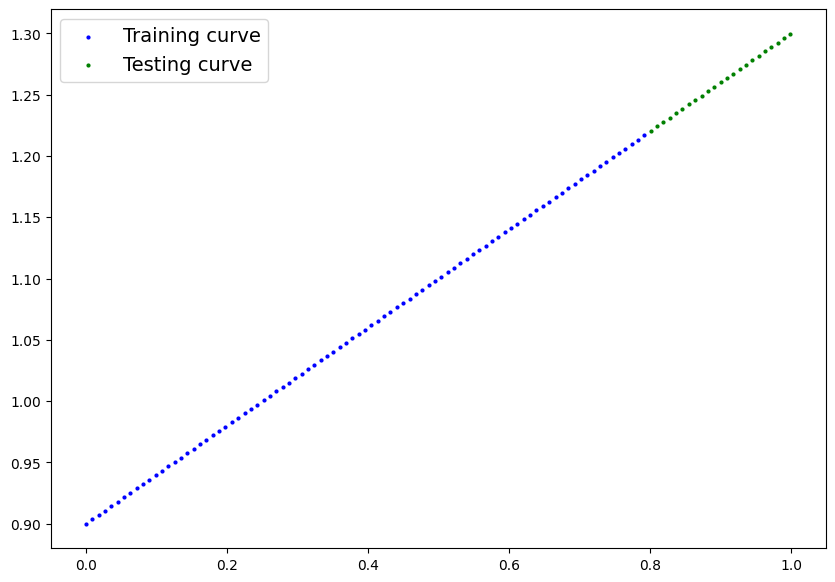

In [131]:
plot_predictionsv2()

In [132]:
#model
class linearRegressionv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                 out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor :
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = linearRegressionv2()
model_1, model_1.state_dict()

(linearRegressionv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [133]:
#check model current device
next(model_1.parameters()).to(device)

tensor([[0.7645]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [134]:
#set the model to use target device
model_1.to(device)
next(model_1.parameters()).to(device)

Parameter containing:
tensor([[0.7645]], device='cuda:0', requires_grad=True)

###training

In [137]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr = 0.01)


torch.manual_seed(42)
epoches = 200

X_train_0 = X_train_0.to(device)
y_train_0 = y_train_0.to(device)
X_test_0 = X_test_0.to(device)
y_test_0 = y_test_0.to(device)

#training loop
for epoch in range(epoches):
  model_1.train()
  y_preds_0 = model_1(X_train_0)
  loss = loss_fn(y_preds_0, y_train_0)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing loop
  model_1.eval()
  with torch.inference_mode():
    y_test_pred = model_1(X_test_0)
    test_loss = loss_fn(y_test_pred, y_test_0)

  #print what is happening
  if epoch % 10 == 0:
    print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

epoch: 0 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 10 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 20 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 30 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 40 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 50 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 60 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 70 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 80 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 90 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 100 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 110 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 120 | loss: 0.0028065363876521587 | test loss: 0.0073402137495577335
epoch: 130 | loss: 0.00

In [138]:
print(model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.4068]], device='cuda:0')), ('linear_layer.bias', tensor([0.9001], device='cuda:0'))])


In [139]:
weight, bias

(0.4, 0.9)

In [140]:
model_1.eval()
with torch.inference_mode():
  new_y_preds_0 = model_1(X_test_0)

new_y_preds_0[:10], y_test_0[:10]

(tensor([[1.2260],
         [1.2296],
         [1.2333],
         [1.2369],
         [1.2406],
         [1.2443],
         [1.2479],
         [1.2516],
         [1.2552],
         [1.2589]], device='cuda:0'),
 tensor([[1.2204],
         [1.2240],
         [1.2276],
         [1.2312],
         [1.2348],
         [1.2384],
         [1.2420],
         [1.2456],
         [1.2492],
         [1.2528]], device='cuda:0'))

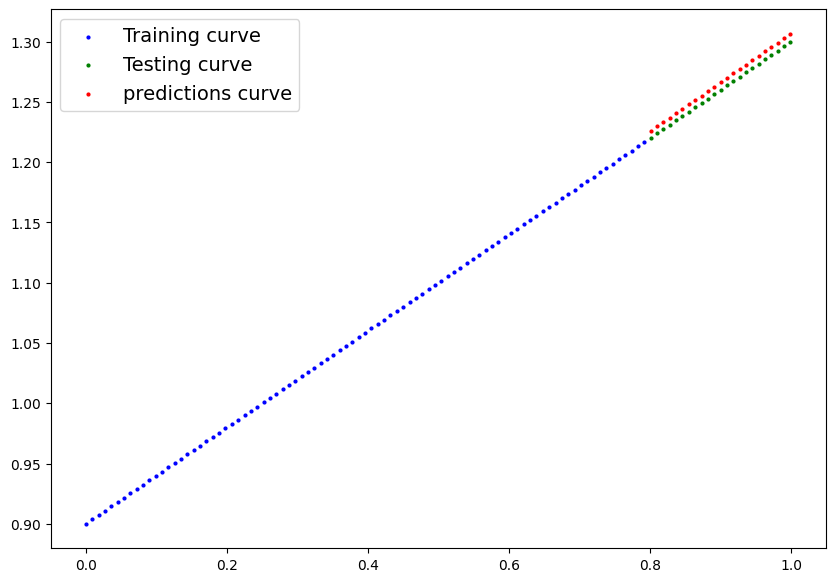

In [141]:
plot_predictionsv2(predictions=new_y_preds_0.cpu())

###saving and loading the model

In [142]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "MYMLBEG.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model saved to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Model saved to: models/MYMLBEG.pth


In [143]:
#loading the model
loaded_model_1 = linearRegressionv2()

#load state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

next(loaded_model_1.parameters()).to(device)
#evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_pred = loaded_model_1(X_test_0)

loaded_model_1_pred == new_y_preds_0

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# **3. classification**

In [144]:
#neural network classification with

In [145]:
#mmm lets use different doc